In [1]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
# Remplacez 'chemin/vers/votre/projet/module' par le chemin absolu réel vers le dossier "module" via la commande pwd
module_path = '/Users/eliotsouthon/Desktop/POC/POC/Code/Modules'  
sys.path.append(module_path)
import ma_bibliotheque 

In [2]:
csv_file_paths=ma_bibliotheque.path_data('/Users/eliotsouthon/Desktop/POC/POC/Data/Data_silver')
# Affiche la liste des chemins pour vérifier
print("Liste des chemins des fichiers CSV :")
for path in csv_file_paths:
    print(path)

Liste des chemins des fichiers CSV :
/Users/eliotsouthon/Desktop/POC/POC/Data/Data_silver/weather_1_51.csv
/Users/eliotsouthon/Desktop/POC/POC/Data/Data_silver/e_w_1_51.csv
/Users/eliotsouthon/Desktop/POC/POC/Data/Data_silver/energy_1_51.csv


In [3]:
# Load the data
df_energy = pd.read_csv(csv_file_paths[2], sep=';',encoding='utf-8') 
df_weather = pd.read_csv(csv_file_paths[0], sep=';',encoding='utf-8') 
df_energy['Date'] = pd.to_datetime(df_energy['Date'])
df_weather['Date'] = pd.to_datetime(df_energy['Date'])

In [4]:
print(df_energy.shape)
print(df_energy.head())

(99300, 2)
                       Date  Consommation brute électricité (MW) - RTE
0 2012-12-31 23:00:00+00:00                                     4943.0
1 2013-01-01 00:00:00+00:00                                     4825.5
2 2013-01-01 01:00:00+00:00                                     4876.0
3 2013-01-01 02:00:00+00:00                                     4642.5
4 2013-01-01 03:00:00+00:00                                     4390.0


In [5]:
print(df_weather.shape)
print(df_weather.head())

(504523, 4)
    T   U  FF                      Date
0 NaN NaN NaN 2012-12-31 23:00:00+00:00
1 NaN NaN NaN 2013-01-01 00:00:00+00:00
2 NaN NaN NaN 2013-01-01 01:00:00+00:00
3 NaN NaN NaN 2013-01-01 02:00:00+00:00
4 NaN NaN NaN 2013-01-01 03:00:00+00:00


In [6]:
df_energy['Date'][0]


Timestamp('2012-12-31 23:00:00+0000', tz='UTC')

In [7]:
df_weather['Date'][0]


Timestamp('2012-12-31 23:00:00+0000', tz='UTC')

In [8]:
print(type(df_energy['Date'][0]))


<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [9]:
print(type(df_weather['Date'][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [10]:
df_fusion=pd.merge(df_energy,df_weather, on=["Date"], how="inner")
df_fusion.shape

(99300, 5)

In [11]:
df_fusion.head()

,Date,Consommation brute électricité (MW) - RTE,T,U,FF
0,2012-12-31 23:00:00+00:00,4943.0,NaN,NaN,NaN
1,2013-01-01 00:00:00+00:00,4825.5,NaN,NaN,NaN
2,2013-01-01 01:00:00+00:00,4876.0,NaN,NaN,NaN
3,2013-01-01 02:00:00+00:00,4642.5,NaN,NaN,NaN
4,2013-01-01 03:00:00+00:00,4390.0,NaN,NaN,NaN


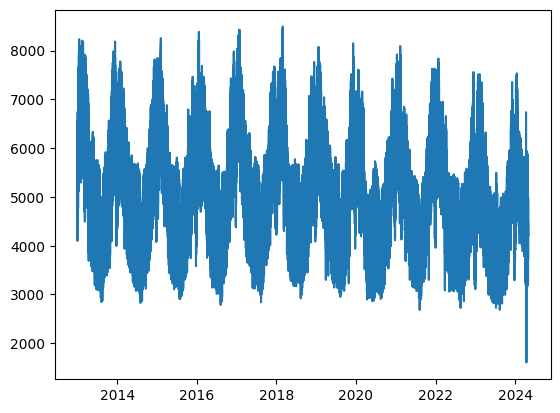

In [12]:
plt.plot(df_fusion['Date'], df_fusion['Consommation brute électricité (MW) - RTE'])


In [13]:
ma_bibliotheque.check_completeness(df_fusion)

Analyse des valeurs manquantes par colonne :
 Date                                             0
Consommation brute électricité (MW) - RTE        0
T                                             1638
U                                            73056
FF                                           73172
dtype: int64

Nombre total de lignes: 99300

Lignes contenant des valeurs manquantes: 73188

Le DataFrame contient des valeurs manquantes.


In [14]:
# Imputer les valeurs manquantes en utilisant une fenêtre glissante
df_fusion['T'] = df_fusion['T'].fillna(df_fusion['T'].rolling(window=3, min_periods=1).mean())
df_fusion['U'] = df_fusion['U'].fillna(df_fusion['U'].rolling(window=3, min_periods=1).mean())
df_fusion['FF'] = df_fusion['FF'].fillna(df_fusion['FF'].rolling(window=3, min_periods=1).mean())

# Supprimer les lignes contenant des valeurs manquantes
df_fusion = df_fusion.dropna()



In [15]:
ma_bibliotheque.check_completeness(df_fusion)

Analyse des valeurs manquantes par colonne :
 Date                                         0
Consommation brute électricité (MW) - RTE    0
T                                            0
U                                            0
FF                                           0
dtype: int64

Nombre total de lignes: 26183

Lignes contenant des valeurs manquantes: 0

Le DataFrame est complet (aucune valeur manquante).


In [ ]:
numero_region=ma_bibliotheque.get_country_iso_numeric("france")
numero_pays=1

# Construire le nom du fichier en utilisant la première valeur de la colonne 'Code INSEE région'
nom_fichier = f"e_w_{numero_pays}_{numero_region}.csv"

# Définir le chemin complet en joignant le chemin et le nom du fichier
chemin_complet = f"/Users/eliotsouthon/Desktop/POC/POC/Data/Data_silver/{nom_fichier}"

# Sauvegarder le DataFrame en CSV
df_fusion.to_csv(chemin_complet, index=False, sep=';', encoding='utf-8')